# 1. Import libraries and python files

In [65]:
#import useful libraries 
import pandas as pd
import json
import sys
import requests
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import calendar
%matplotlib inline 

from data_loader import *
%load_ext autoreload
%autoreload 2


##link to the datasets
##https://www.cs.cmu.edu/~ark/personas/
##https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?resource=download&select=movies_metadata.csv
##https://www.kaggle.com/datasets/ashirwadsangwan/imdb-dataset
##https://www.kaggle.com/datasets/unanimad/the-oscar-award/data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 2. Load the different datasets

In [66]:
##load datasets from CMU dataset
df_character = load_character().copy()
df_movie = load_movie().copy()
df_name_cluster = load_name_cluster().copy()
df_summary = load_plot_summary().copy()
df_tropes_cluster = load_tropes_cluster().copy()

In [67]:
df_movie.head()

,Wikipedia ID,Freebase ID,Name,Release date,Box office,Runtime,Languages (Freebase ID:name tuples),Countries (Freebase ID:name tuples),genres (Freebase ID:name tuples),Year,Month,Day
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,8,24
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000,2,16
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988,<NA>,<NA>
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1987,<NA>,<NA>
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",1983,<NA>,<NA>


In [68]:
df_movie.shape

(81741, 12)

In [69]:
# Replace 'id-translation.wikidata.json' with the path to your JSON file
file_path = 'id-translation.wikidata.json'

# Load the JSON file into a DataFrame
df_id_translation = pd.read_json(file_path, orient='records', lines=True)

# Display the loaded DataFrame
display(df_id_translation)

,tconst,Freebase ID
0,nm0010930,/m/0282x
1,nm0124133,/m/09b6zr
2,nm0684496,/m/014d3
3,nm0061667,/m/01rgr
4,tt1675434,/m/0hgqwpj
...,...,...
990440,tt20913312,None
990441,tt29623578,None
990442,nm1456284,None
990443,tt27348595,None


In [70]:
df_id_translation = df_id_translation.dropna(subset=['Freebase ID'])
#df_id_translation.drop_duplicates(subset=['Freebase ID'], keep='first', inplace=True)
print(df_id_translation.shape)

(397518, 2)


In [71]:
df_id_translation.drop_duplicates(subset=['Freebase ID'], keep='first', inplace=True)
print(df_id_translation.shape)

(396337, 2)


In [72]:
df_movie = pd.merge(df_movie, df_id_translation, on='Freebase ID', how='left')
display(df_movie)

,Wikipedia ID,Freebase ID,Name,Release date,Box office,Runtime,Languages (Freebase ID:name tuples),Countries (Freebase ID:name tuples),genres (Freebase ID:name tuples),Year,Month,Day,tconst
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,8,24,tt0228333
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000,2,16,tt0245916
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988,<NA>,<NA>,tt0094806
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1987,<NA>,<NA>,tt0094320
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",1983,<NA>,<NA>,tt0083949
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",2011,3,19,tt1816585
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",2011,1,21,tt1606259
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",1972,9,22,tt0362411
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...",1992,5,21,tt0113726


In [73]:
#compute percentage of missing values for df_mvoei
percentage_missing_values_year = (df_movie['Year'].isna().sum()/len(df_movie['Year']))*100
print(f"The percentage of missing values 'Year' release date is {format(percentage_missing_values_year, '.3f')}%.")

percentage_missing_values_month = (df_movie['Month'].isna().sum()/len(df_movie['Month']))*100
print(f"The percentage of missing values 'Month' release date (and therefore 'Day') is {format(percentage_missing_values_month, '.3f')}%.")

percentage_missing_values_revenues = (df_movie['Box office'].isna().sum()/len(df_movie['Box office']))*100
print(f"The percentage of missing values 'Box office' is {format(percentage_missing_values_revenues, '.3f')}%.")

percentage_missing_values_runtime = (df_movie['Runtime'].isna().sum()/len(df_movie['Runtime']))*100
print(f"The percentage of missing values 'Runtime' is {format(percentage_missing_values_runtime, '.3f')}%.")

percentage_missing_values_tconst = (df_movie['tconst'].isna().sum()/len(df_movie['tconst']))*100
print(f"The percentage of missing values 'tconst' is {format(percentage_missing_values_tconst, '.3f')}%.")


The percentage of missing values 'Year' release date is 8.444%.
The percentage of missing values 'Month' release date (and therefore 'Day') is 51.832%.
The percentage of missing values 'Box office' is 89.722%.
The percentage of missing values 'Runtime' is 25.018%.
The percentage of missing values 'tconst' is 9.769%.


In [74]:
##As we can see, a lot of 'Box office' data is missing

# 3. Load addtionnal datasets and merge what we need 

In [75]:
#load imdb dataset (from kaggle)
df_imdb_movie = load_movie_imdb_kaggle()
df_imdb_rating = load_rating_imdb_kaggle() 

In [76]:
#merge movies with rating 
df_movie_rating = pd.merge(df_imdb_movie, df_imdb_rating, on='tconst', how='inner')
display(df_movie_rating)

,tconst,titleType,Name,originalTitle,isAdult,Year,endYear,Runtime,genres,averageRating,numVotes
0,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45.0,Romance,5.3,207
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100.0,"Documentary,News,Sport",5.3,484
2,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100.0,\N,4.1,15
3,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70.0,"Action,Adventure,Biography",6.0,854
4,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90.0,Drama,5.0,21
...,...,...,...,...,...,...,...,...,...,...,...
299375,tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,2020,\N,84.0,Thriller,5.8,1446
299376,tt9916362,movie,Coven,Akelarre,0,2020,\N,92.0,"Drama,History",6.4,5600
299377,tt9916428,movie,The Secret of China,Hong xing zhao yao Zhong guo,0,2019,\N,NaN,"Adventure,History,War",3.5,17
299378,tt9916538,movie,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,0,2019,\N,123.0,Drama,8.6,7


In [77]:
#merge CMU dataset with IMDB dataset
df_movie = pd.merge(df_movie, df_movie_rating[['tconst', 'averageRating', 'numVotes']], on=['tconst'], how='left')
display(df_movie)

,Wikipedia ID,Freebase ID,Name,Release date,Box office,Runtime,Languages (Freebase ID:name tuples),Countries (Freebase ID:name tuples),genres (Freebase ID:name tuples),Year,Month,Day,tconst,averageRating,numVotes
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,8,24,tt0228333,4.9,56854.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000,2,16,tt0245916,NaN,NaN
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988,<NA>,<NA>,tt0094806,5.6,40.0
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1987,<NA>,<NA>,tt0094320,6.1,2888.0
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",1983,<NA>,<NA>,tt0083949,6.0,621.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",2011,3,19,tt1816585,NaN,NaN
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",2011,1,21,tt1606259,6.8,3191.0
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",1972,9,22,tt0362411,5.8,110.0
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...",1992,5,21,tt0113726,NaN,NaN


In [78]:
percentage_missing_values_rating = (df_movie['averageRating'].isna().sum()/len(df_movie['averageRating']))*100
print(f"The percentage of missing values 'averageRating' is {format(percentage_missing_values_rating, '.3f')}%.")

percentage_missing_values_votes = (df_movie['numVotes'].isna().sum()/len(df_movie['numVotes']))*100
print(f"The percentage of missing values 'numVotes' is {format(percentage_missing_values_votes, '.3f')}%.")

print(f"The number of movies with missing values for 'averageRating' and 'numVotes' is {df_movie['averageRating'].isna().sum()}.")

The percentage of missing values 'averageRating' is 31.271%.
The percentage of missing values 'numVotes' is 31.271%.
The number of movies with missing values for 'averageRating' and 'numVotes' is 25561.


In [79]:
## load kaggle movie metadata
df_kaggle_movie = load_movie_kaggle()
display(df_kaggle_movie)

,adult,belongs_to_collection,budget,genres,homepage,movieId,tconst,original_language,original_title,overview,...,spoken_languages,status,tagline,Name,video,vote_average,vote_count,Year,Month,Day
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995,10,30
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995,12,15
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995,12,22
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995,12,22
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0,<NA>,<NA>,<NA>
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0,2011,11,17
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0,2003,8,1
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,[],Released,NaN,Satan Triumphant,False,0.0,0.0,1917,10,21


In [80]:
#merge the datasets on the 'Name', 'Year' and 'tconst' columns
df_movie = df_movie.merge(df_kaggle_movie[['Name', 'Year', 'tconst', 'Month', 'Day']], on=['Name', 'Year','tconst'], how='left', suffixes=('', '_df2'))

#use 'combine_first' to fill in the 'Box office' values from df_kaggle_movie where they are NaN in df_movie
df_movie['Month'] = df_movie['Month'].combine_first(df_movie['Month_df2'])
df_movie['Day'] = df_movie['Day'].combine_first(df_movie['Day_df2'])

#drop the extra 'Box office' column from df_kaggle_movie
df_movie.drop('Month_df2', axis=1, inplace=True)
df_movie.drop('Day_df2', axis=1, inplace=True)

df_movie = df_movie.drop_duplicates(subset='Wikipedia ID', keep='first')

display(df_movie)

,Wikipedia ID,Freebase ID,Name,Release date,Box office,Runtime,Languages (Freebase ID:name tuples),Countries (Freebase ID:name tuples),genres (Freebase ID:name tuples),Year,Month,Day,tconst,averageRating,numVotes
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,8,24,tt0228333,4.9,56854.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000,2,16,tt0245916,NaN,NaN
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988,<NA>,<NA>,tt0094806,5.6,40.0
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1987,<NA>,<NA>,tt0094320,6.1,2888.0
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",1983,<NA>,<NA>,tt0083949,6.0,621.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81752,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",2011,3,19,tt1816585,NaN,NaN
81753,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",2011,1,21,tt1606259,6.8,3191.0
81754,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",1972,9,22,tt0362411,5.8,110.0
81755,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...",1992,5,21,tt0113726,NaN,NaN


In [81]:
percentage_missing_values_year = (df_movie['Year'].isna().sum()/len(df_movie['Year']))*100
print(f"The percentage of missing values 'Year' release date is {format(percentage_missing_values_year, '.3f')}%.")

percentage_missing_values_month = (df_movie['Month'].isna().sum()/len(df_movie['Month']))*100
print(f"The percentage of missing values 'Month' release date (and therefore 'Day') is {format(percentage_missing_values_month, '.3f')}%.")

#as we can see, we decrease the percentage of missing values for 'Month' and 'Day' by merging the two datasets by almost 10%

The percentage of missing values 'Year' release date is 8.444%.
The percentage of missing values 'Month' release date (and therefore 'Day') is 42.899%.


In [82]:
#load oscar reward dataset
df_oscar = load_oscar_winner()
display(df_oscar)

,Year,year_ceremony,ceremony,category,name,Name,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False
...,...,...,...,...,...,...,...
10755,2022,2023,95,WRITING (Original Screenplay),Written by Daniel Kwan & Daniel Scheinert,Everything Everywhere All at Once,True
10756,2022,2023,95,WRITING (Original Screenplay),Written by Steven Spielberg & Tony Kushner,The Fabelmans,False
10757,2022,2023,95,WRITING (Original Screenplay),Written by Todd Field,Tár,False
10758,2022,2023,95,WRITING (Original Screenplay),Written by Ruben Östlund,Triangle of Sadness,False


In [83]:
#load file with ceremony dates
df_date_ceremony = pd.read_csv('oscars_ceremony_dates.csv')

#filter the dataframe to only include rows where 'winner' is True
df_winner_movie = df_oscar[df_oscar['winner'] == True]

#merge the datasets on ceremony number
df_winner_movie = pd.merge(df_winner_movie, df_date_ceremony, on='ceremony', how='left')
display(df_winner_movie)

,Year,year_ceremony,ceremony,category,name,Name,winner,date
0,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True,1929-05-16
1,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True,1929-05-16
2,1927,1928,1,ART DIRECTION,William Cameron Menzies,The Dove;,True,1929-05-16
3,1927,1928,1,CINEMATOGRAPHY,Charles Rosher,Sunrise,True,1929-05-16
4,1927,1928,1,CINEMATOGRAPHY,Karl Struss,Sunrise,True,1929-05-16
...,...,...,...,...,...,...,...,...
2144,2022,2023,95,SOUND,"Mark Weingarten, James H. Mather, Al Nelson, C...",Top Gun: Maverick,True,2023-03-12
2145,2022,2023,95,VISUAL EFFECTS,"Joe Letteri, Richard Baneham, Eric Saindon and...",Avatar: The Way of Water,True,2023-03-12
2146,2022,2023,95,WRITING (Adapted Screenplay),Screenplay by Sarah Polley,Women Talking,True,2023-03-12
2147,2022,2023,95,WRITING (Original Screenplay),Written by Daniel Kwan & Daniel Scheinert,Everything Everywhere All at Once,True,2023-03-12


In [84]:
#group by the movie name and count the winners time
df_winner_movie = df_winner_movie.groupby('Name').agg(
    num_oscars_won=pd.NamedAgg(column='winner', aggfunc='size'),
    date_won=pd.NamedAgg(column='date', aggfunc=lambda x: list(x))
).reset_index()

#sort the movies by oscars won
df_oscar_wins = df_winner_movie.sort_values(by='num_oscars_won', ascending=False)

display(df_oscar_wins)


,Name,num_oscars_won,date_won
1203,Titanic,12,"[1954-03-25, 1998-03-23, 1998-03-23, 1998-03-2..."
1261,West Side Story,11,"[1962-04-09, 1962-04-09, 1962-04-09, 1962-04-0..."
1045,The Lord of the Rings: The Return of the King,11,"[2004-02-29, 2004-02-29, 2004-02-29, 2004-02-2..."
130,Ben-Hur,11,"[1960-04-04, 1960-04-04, 1960-04-04, 1960-04-0..."
376,Gigi,9,"[1959-04-06, 1959-04-06, 1959-04-06, 1959-04-0..."
...,...,...,...
516,Kolya,1,[1997-03-24]
517,Kon-Tiki,1,[1952-03-20]
518,Krakatoa,1,[1934-03-16]
521,La Cucaracha,1,[1935-02-27]


In [85]:
#merge CUM and oscars awards dataset
df_movie = pd.merge(df_movie, df_oscar_wins, left_on='Name', right_on='Name', how='left')

#replace NaN values in 'num_oscars_won' with 0 for movies that didn't win any Oscars
df_movie['num_oscars_won'].fillna(0, inplace=True)

display(df_movie)

,Wikipedia ID,Freebase ID,Name,Release date,Box office,Runtime,Languages (Freebase ID:name tuples),Countries (Freebase ID:name tuples),genres (Freebase ID:name tuples),Year,Month,Day,tconst,averageRating,numVotes,num_oscars_won,date_won
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,8,24,tt0228333,4.9,56854.0,0.0,NaN
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000,2,16,tt0245916,NaN,NaN,0.0,NaN
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988,<NA>,<NA>,tt0094806,5.6,40.0,0.0,NaN
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1987,<NA>,<NA>,tt0094320,6.1,2888.0,0.0,NaN
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",1983,<NA>,<NA>,tt0083949,6.0,621.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",2011,3,19,tt1816585,NaN,NaN,0.0,NaN
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",2011,1,21,tt1606259,6.8,3191.0,0.0,NaN
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",1972,9,22,tt0362411,5.8,110.0,0.0,NaN
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...",1992,5,21,tt0113726,NaN,NaN,0.0,NaN


In [86]:
percentage_oascar_movies = ((df_movie['num_oscars_won']!=0).sum()/len(df_movie['num_oscars_won']))*100
print(f"The percentage of movies having won an oscar is {format(percentage_oascar_movies, '.3f')}%.")

The percentage of movies having won an oscar is 1.895%.


# 4. Research on release month and revenues 

## 4.0 Methology


-Can we find any trends in movie release dates within a year? Do these trends change across countries ? across history ?

We mainly use regression method to find whether there exists some relationship between 'release month' and 'Box office'.
The following is function we use:
$$Y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_{11}x_{11}$$

$Y$ = Box office \
$X$ = Dummies variable of release month (Note: here we use December as bench mark)

In section 4.1 we regress box office on dummies varibles of release month for the whole data set. 

In section 4.2 we regress box office on dummies varibles of release month with respect to different countries. Note that in section 2, we only choose the countries with more than 200 datasets, because it will lack of accuracy due to insufficient samples.

In section 4.3, we regress box office on dummies variables of release month with respect to consecutive time periods (i.e. 1920-1940, 1940-1960, 1960-1980, 1980-2000, 2000-2012)


## 4.1 Regressing 'Box office' on 'month release'



### 4.1.1 Clean the data
1. Deep copy the df_movie data set
2. Drop 'nan' row for box office and Month columns.
3. Drop the row with 'Year' smaller than 1800.

In [95]:
# Deep copy the data set
df_movie_month = df_movie.copy(deep=True)

# Drop 'nan' row of box office and month release columns.
df_movie_month.dropna(subset = ['Box office', 'Month'], inplace = True)

# Drop the row with 'Year' smaller than 1800.
df_movie_month = df_movie_month[df_movie_month['Year'] >= 1800]

### 4.1.2 Regressing box office on release month for all data. 
Note that we will store the coefficients and the corresponding t-values. And then we will visualize them on section 4.2

In [96]:
# Use w as a dictionary to store the coefficient.
w = {}

# Build up dependent varibale
movie_revenues = df_movie_month['Box office'].values

# Build up independent variable
month_release = pd.get_dummies(df_movie_month['Month']).values
# Remove one month column to select it as a baseline here December
month_release = month_release[:, :-1].astype(int)
month_release = sm.add_constant(month_release)

# Regress Box officie on release month for all data and store coefficient and and t-values
model = sm.OLS(movie_revenues, month_release).fit()
w['ALL'] = [model.params, model.tvalues]

## 4.2 Regressing 'Box office' on 'month release' for different countries

### 4.2.1 Get the list of countries

In [97]:
def get_list_of_countries(df_series):
    """This is the function to get the list of countries' name from a dataframe series.

    Args:
        df_series (data frame series): the column of data frame series include the countries name

    Returns:
        list_of_countries (list): list of countries name
    """
    #The following step is to find the list of all the countries name which is show in the 'Countries (Freebase ID:name tuples)' column
    # Define a function to extract country names
    def extract_countries(location):
        # Convert the string to a dictionary
        location_dict = json.loads(location.replace("'", "\""))
        # Extract and return the country names
        return list(location_dict.values())
    #transfer the text of 'Countries (Freebase ID:name tuples)' into some string only contain the countries name
    df_aux = df_series.apply(extract_countries)
    df_aux = pd.DataFrame(df_aux.apply(lambda x: ', '.join(x) if x else None))
    df_aux = df_aux.dropna()
    #list the unique countries name.
    list_of_countries = df_aux['Countries (Freebase ID:name tuples)'].unique()
    string_of_countries = ','.join(list_of_countries)
    list_of_countries = string_of_countries.split(',')
    list_of_countries = [x.strip() for x in list_of_countries]
    list_of_countries = list(set(list_of_countries))
    return list_of_countries

list_of_countries = get_list_of_countries(df_movie_month['Countries (Freebase ID:name tuples)'])

# Drop the name with direction (e.g west, south, east, north), except the countries like South Africa.

# Build up the ['South', 'North', 'West', 'East', 'south', 'north', 'west', 'east']
direction = ['South','North','West','East']
direction_2 = [x.lower() for x in direction]
di = direction + direction_2
display(di)

# To see which name of the courties contain ['South', 'North', 'West', 'East', 'south', 'north', 'west', 'east']
for i in list_of_countries:
    if any(substring in i for substring in di):
        print(i)
        
# Delete south korea and west germany
list_of_countries.remove('South Korea')
list_of_countries.remove('West Germany')

['South', 'North', 'West', 'East', 'south', 'north', 'west', 'east']

South Africa
South Korea
West Germany


### 4.2.2 Regression for each countries

In [98]:
# We regress box office on dummies varibles of release month with respect to different countries. 
# Note that in section 2, we only choose the countries with more than 200 datasets.
for country in list_of_countries:
    index_of_data = df_movie_month['Countries (Freebase ID:name tuples)'].str.contains(country)
    if index_of_data.sum() >= 200:
        model = sm.OLS(df_movie_month[index_of_data]['Box office'].values, month_release[index_of_data,:]).fit()
        w[country] = [model.params, model.tvalues]

### 4.2.3 Visualize all the results

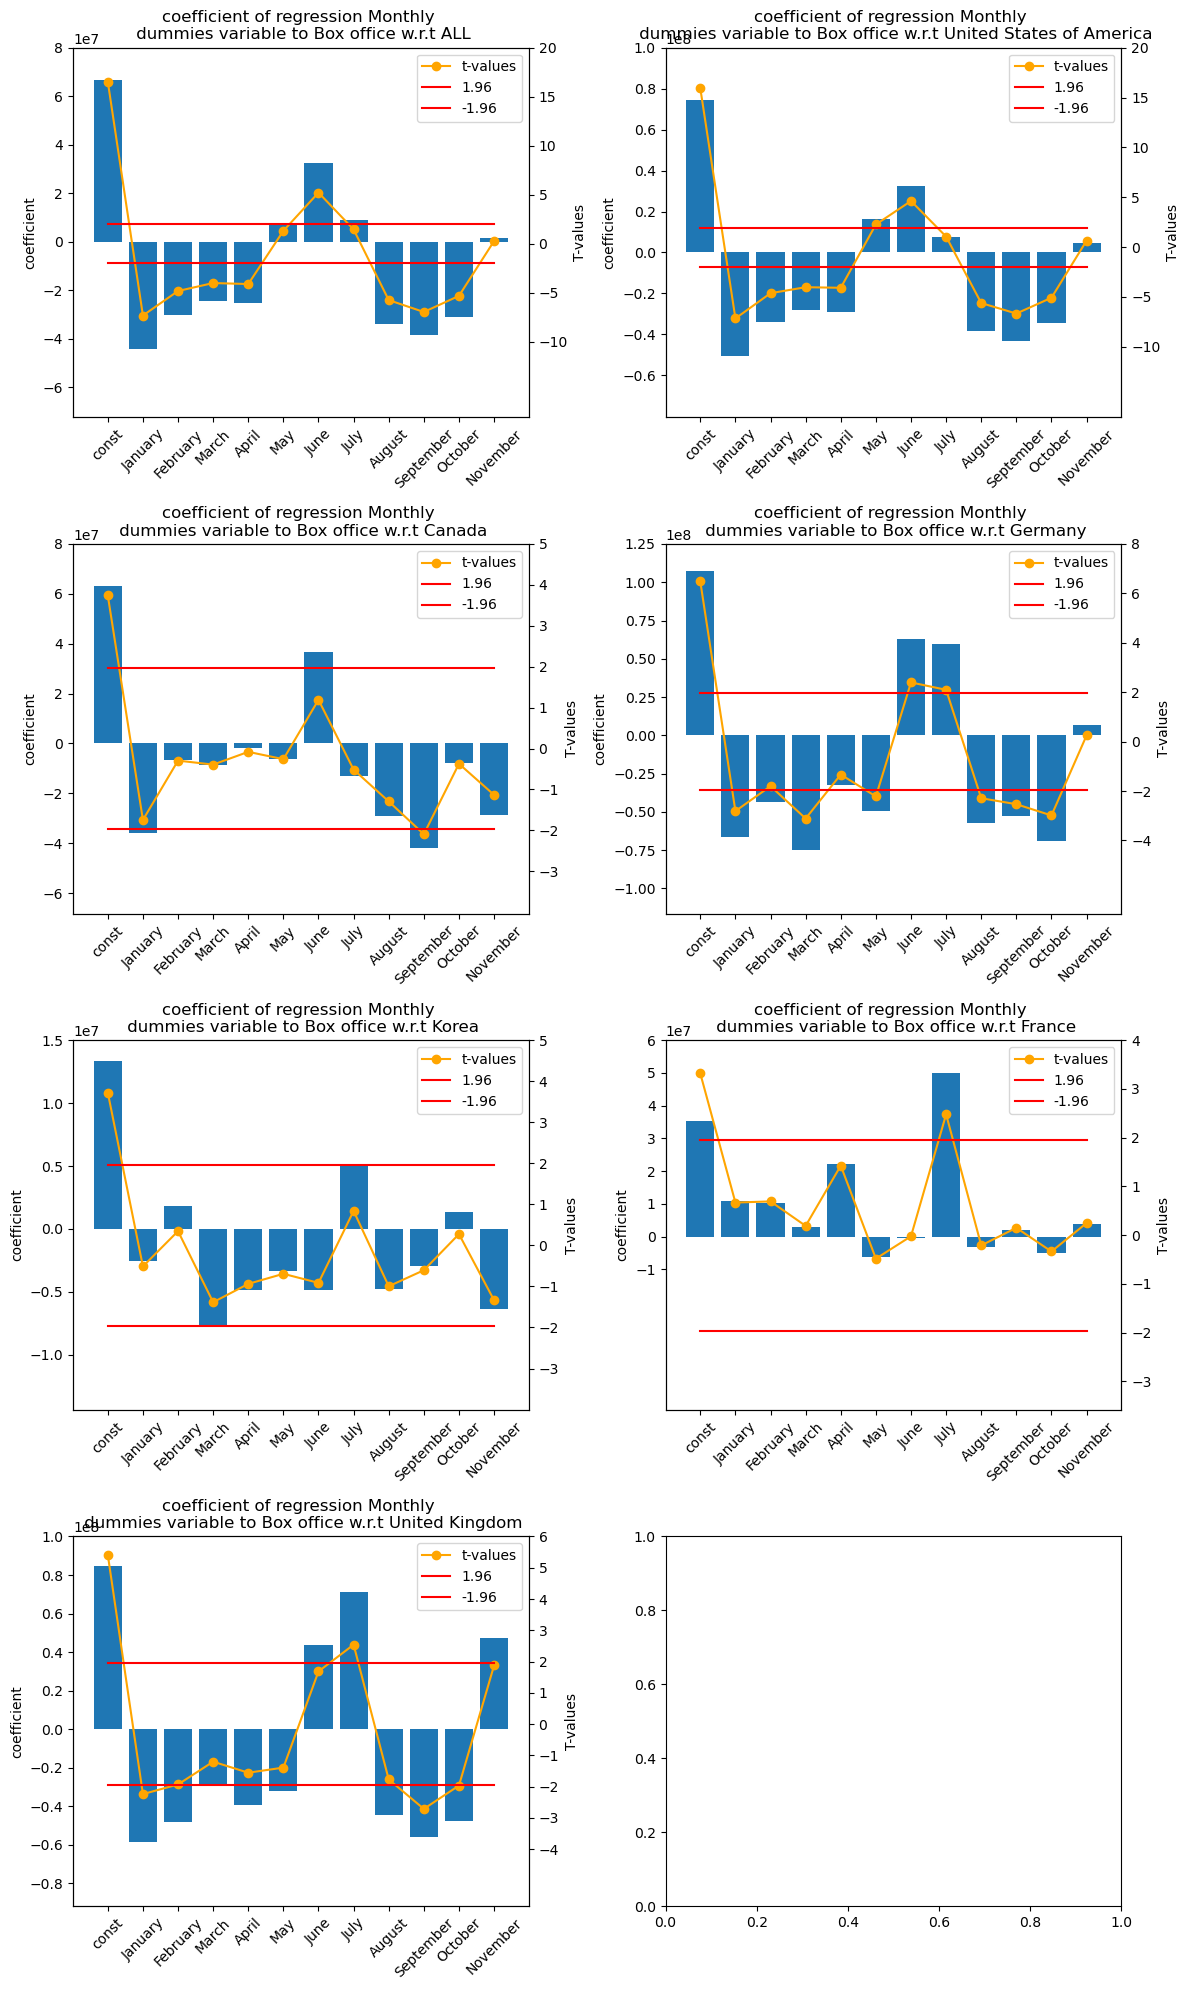

In [118]:
# Generate a list of month names
months = list(calendar.month_name)[1:]
months = months[:-1]
months.insert(0, 'const')


def box_month_plot(height, width, dictionary, months, f_h, f_w):
    """Plot the coefficient of regression

    Args:
        height (int): number of subplot in vertical axis
        width (int): number of subplot in horizontal axis
        dictionary (dict): dictionary to store the coefficient and t-values
        months (list): list of month
        f_h (int): height of figure size
        f_w (int): wight of figure size 
    
    """
    # Create a subplot with 4 rows and 2 columns
    fig, axes = plt.subplots(height, width, figsize=(f_h, f_w))
    axes = axes.flatten()

    # Create bar charts for each country
    for i, name in zip(np.arange(0,height*width),dictionary.keys()):
        ax = axes[i]
        ax.bar(months, dictionary[name][0])
        if isinstance(name,int) or isinstance(name,np.int64) :
            ax.set_title('coefficient of regression Monthly \n dummies variable to Box office w.r.t {}-{}'.format(name, name+20))
        else:
            ax.set_title('coefficient of regression Monthly \n dummies variable to Box office w.r.t {}'.format(name))
        ax.set_xticks(range(len(months)))
        ax.set_xticklabels(months, rotation=45)
        ax.set_ylabel('coefficient')
        ax2 = ax.twinx()
        
        # Plot the t-values and 1.96 and -1.96 to check whether the coefficient is significant.
        ax2.plot(months, dictionary[name][1], color='orange', marker='o', label='t-values')
        ax2.plot(months, 12*[1.96], color='red', label='1.96')
        ax2.plot(months, 12*[-1.96], color='red', label='-1.96')
        ax2.set_ylabel('T-values')
        ax2.legend(loc='upper right')
        
        # Align the zero point for the left y-axis and right y-axis.
        aL, aaL = ax.get_ylim()
        aR, aaR = ax2.get_ylim()
        Left = ax.get_yticks()
        Right = ax2.get_yticks()
        aaL = max(aaL,abs(aL))
        aL = min(-aaL,aL)
        aaR = max(aaR,abs(aaR))
        aR = min(-aaR,aR)
        ax.set_ylim(aL,aaL)
        ax2.set_ylim(aR,aaR)
        ax.set_yticks(Left)
        ax2.set_yticks(Right)

    plt.tight_layout()
    plt.show()
    
box_month_plot(4, 2, w, months, 12, 20)

### What we find?
Note: 

Indeed, we find some trend. For overall data and each of the countries, it is significantly that if the movie was release on July it would have higher Box Office than that of the other month. For the release date from January to May and from August to October, almost all the countries have lower Box Officer than the bench mark (i.e. December's Box Office). It is worth noting that the average Box offcier on July is way more higher than the other months in France. 

## 4.3 Regressing 'Box office' on 'month release' for each continuous 20-year time span.

In [92]:
# Take a look at the release year of the movies. 
np.sort(df_movie_month['Year'].unique())

array([1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898,
       1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909,
       1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920,
       1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=object)

In [101]:
# Get the time interval
year_list = 1900 + np.arange(0,121,20)
year_list[0] = df_movie_month['Year'].min()

# Use w_over_twenty_year as a dictionary to store the coefficient
w_over_twenty_year = {}

# Regress box office on release month over the time interval
for i in np.arange(0,len(year_list)-1):
    df = df_movie_month [ (df_movie_month["Year"] >= year_list[i]).values and (df_movie_month["Year"] < year_list[i+1]).values]
    
    # Build up dependent variable (Box office) with respect to different time interval
    movie_revenues = df['Box office'].values
    
    # Build up independent variable (dummies varible of release month) with respect to different time interval
    month_release = pd.get_dummies(df['Month']).values
    month_release = month_release[:, :-1].astype(int)
    month_release = sm.add_constant(month_release)
    
    # Regress box office on release month over the time interval
    # And store the coefficients and corresponding t-values
    model = sm.OLS(movie_revenues, month_release).fit()
    w_over_twenty_year[year_list[i]] = [model.params, model.tvalues]


# Drop the time interval with coefficient less than 12.
store_name = []
for name in w_over_twenty_year.keys():
   if len(w_over_twenty_year[name][0]) < 12:
       store_name.append(name)
for name in store_name:
    del w_over_twenty_year[name]

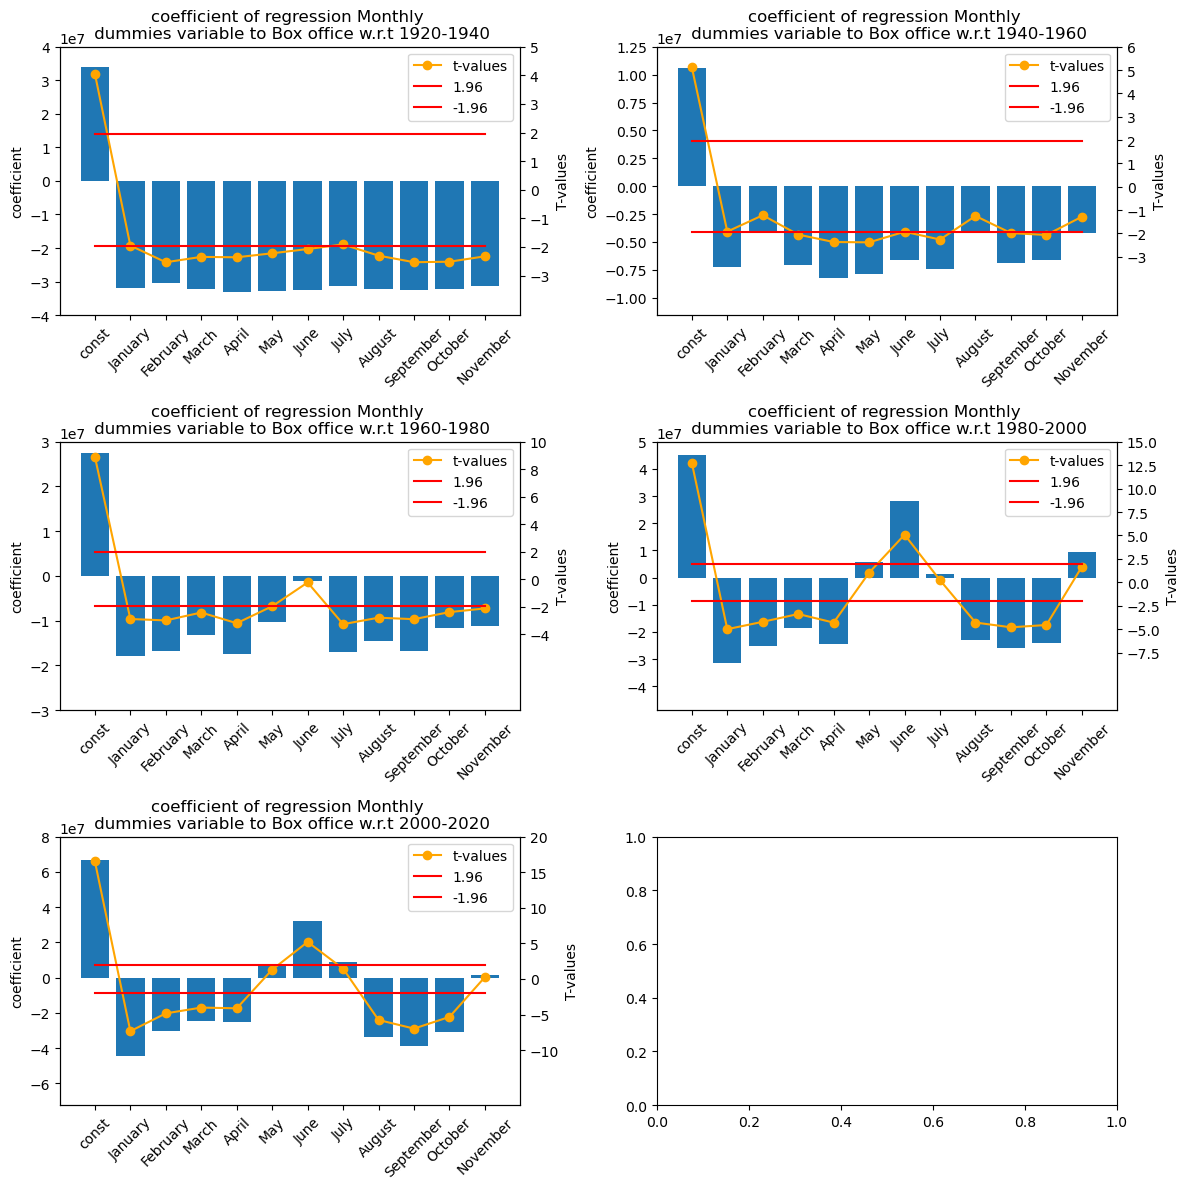

In [119]:
box_month_plot(3, 2, w_over_twenty_year, months, 12, 12)

We find something weird that if we release the movies on December it would be higher than the other months with rolling window of 20 years from 1920 to 1980 on average. It could be a interest topic.

The following step is to add some new independent variables like genre to see if the dummies variable of release month still significant. In other words, we need to add more independent variables to find the 'confounder'.